In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [13]:
df = pd.read_csv('data.txt', delimiter='\t')
df.set_index('College', inplace=True)
df.head()

Win_2015  Win_2017  Rank_2015  Rank_2017
College                                                 
Alabama               12        11          2          4
Clemson               13        12          1          1
LSU                    8         9         22         16
Michigan State        12         9          3         18
Northwestern          10         9          8         14

In [54]:
def assignment(df, centroids, dist_metric):
    if(dist_metric == 'euclidean'):
        for i in centroids.keys():
            df['distance_from_{}'.format(i)] = (
                np.sqrt(
                    (df['x'] - centroids[i][0]) ** 2
                    + (df['y'] - centroids[i][1]) ** 2
                )
            )
    elif(dist_metric == 'manhattan'):
        for i in centroids.keys():
            df['distance_from_{}'.format(i)] = (
                abs(df['x'] - centroids[i][0])
                +abs(df['y'] - centroids[i][1])
            )
    else:
        print('Invalid metric. Select euclidean or manhattan.')
    
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [55]:
def update(df, k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

## Problem 1

Iteration #1


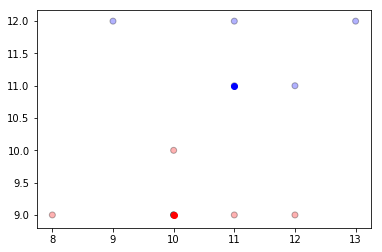

In [56]:
df_t1 = df.drop(['Rank_2015','Rank_2017'], axis=1)
df_t1.columns = ['x','y']

k = 2

# centroids = {
#     1: np.array([7,7]),
#     2: np.array([14,14])
# }

centroids = {
    1: np.array([7,7]),
    2: np.array([7,14])
}
    
colmap = {1: 'r', 2: 'b'}

df_t1 = assignment(df_t1, centroids, 'euclidean')

counter = 0
while True:
    counter += 1
    print('Iteration #{}'.format(counter))
    closest_centroids = df_t1['closest'].copy(deep=True)
    centroids = update(df_t1, centroids)
    df_t1 = assignment(df_t1, centroids, 'euclidean')
    if closest_centroids.equals(df_t1['closest']):
        break

fig = plt.figure()
plt.scatter(df_t1['x'], df_t1['y'], color=df_t1['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

## Problem 2

Iteration #1
Iteration #2


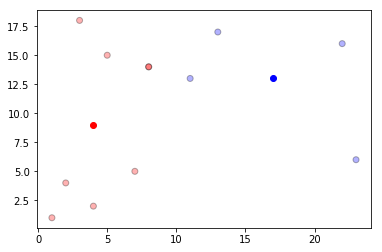

In [57]:
df_t2 = df.drop(['Win_2015','Win_2017'], axis=1)
df_t2.columns = ['x','y']

k = 2

centroids = {
    1: np.array([1,1]),
    2: np.array([25,25])
}
    
colmap = {1: 'r', 2: 'b'}

df_t2 = assignment(df_t2, centroids, 'manhattan')

counter = 0
while True:
    counter += 1
    print('Iteration #{}'.format(counter))
    closest_centroids = df_t2['closest'].copy(deep=True)
    centroids = update(df_t2, centroids)
    df_t2 = assignment(df_t2, centroids, 'manhattan')
    if closest_centroids.equals(df_t2['closest']):
        break

fig = plt.figure()
plt.scatter(df_t2['x'], df_t2['y'], color=df_t2['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()

## Problem 3

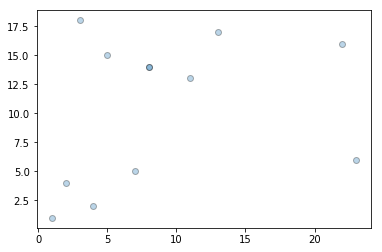

In [63]:
df_t3 = df.drop(['Win_2015','Win_2017'], axis=1)
df_t3.columns = ['x','y']

k = 3

plt.scatter(df_t3['x'], df_t3['y'], alpha=0.3, edgecolor='k')

Iteration #1


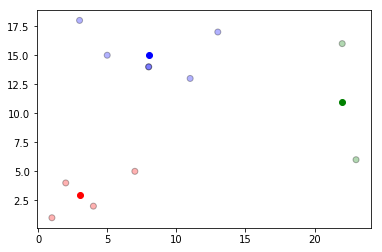

In [64]:
centroids = {
    1: np.array([5,5]),
    2: np.array([8,15]),
    3: np.array([20,15])
}
    
colmap = {1: 'r', 2: 'b', 3: 'g'}

df_t3 = assignment(df_t3, centroids, 'manhattan')

counter = 0
while True:
    counter += 1
    print('Iteration #{}'.format(counter))
    closest_centroids = df_t3['closest'].copy(deep=True)
    centroids = update(df_t3, centroids)
    df_t3 = assignment(df_t3, centroids, 'manhattan')
    if closest_centroids.equals(df_t3['closest']):
        break

fig = plt.figure()
plt.scatter(df_t3['x'], df_t3['y'], color=df_t3['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.show()